Target names (classes): ['malignant' 'benign']
Accuracy: 
0.9707602339181286


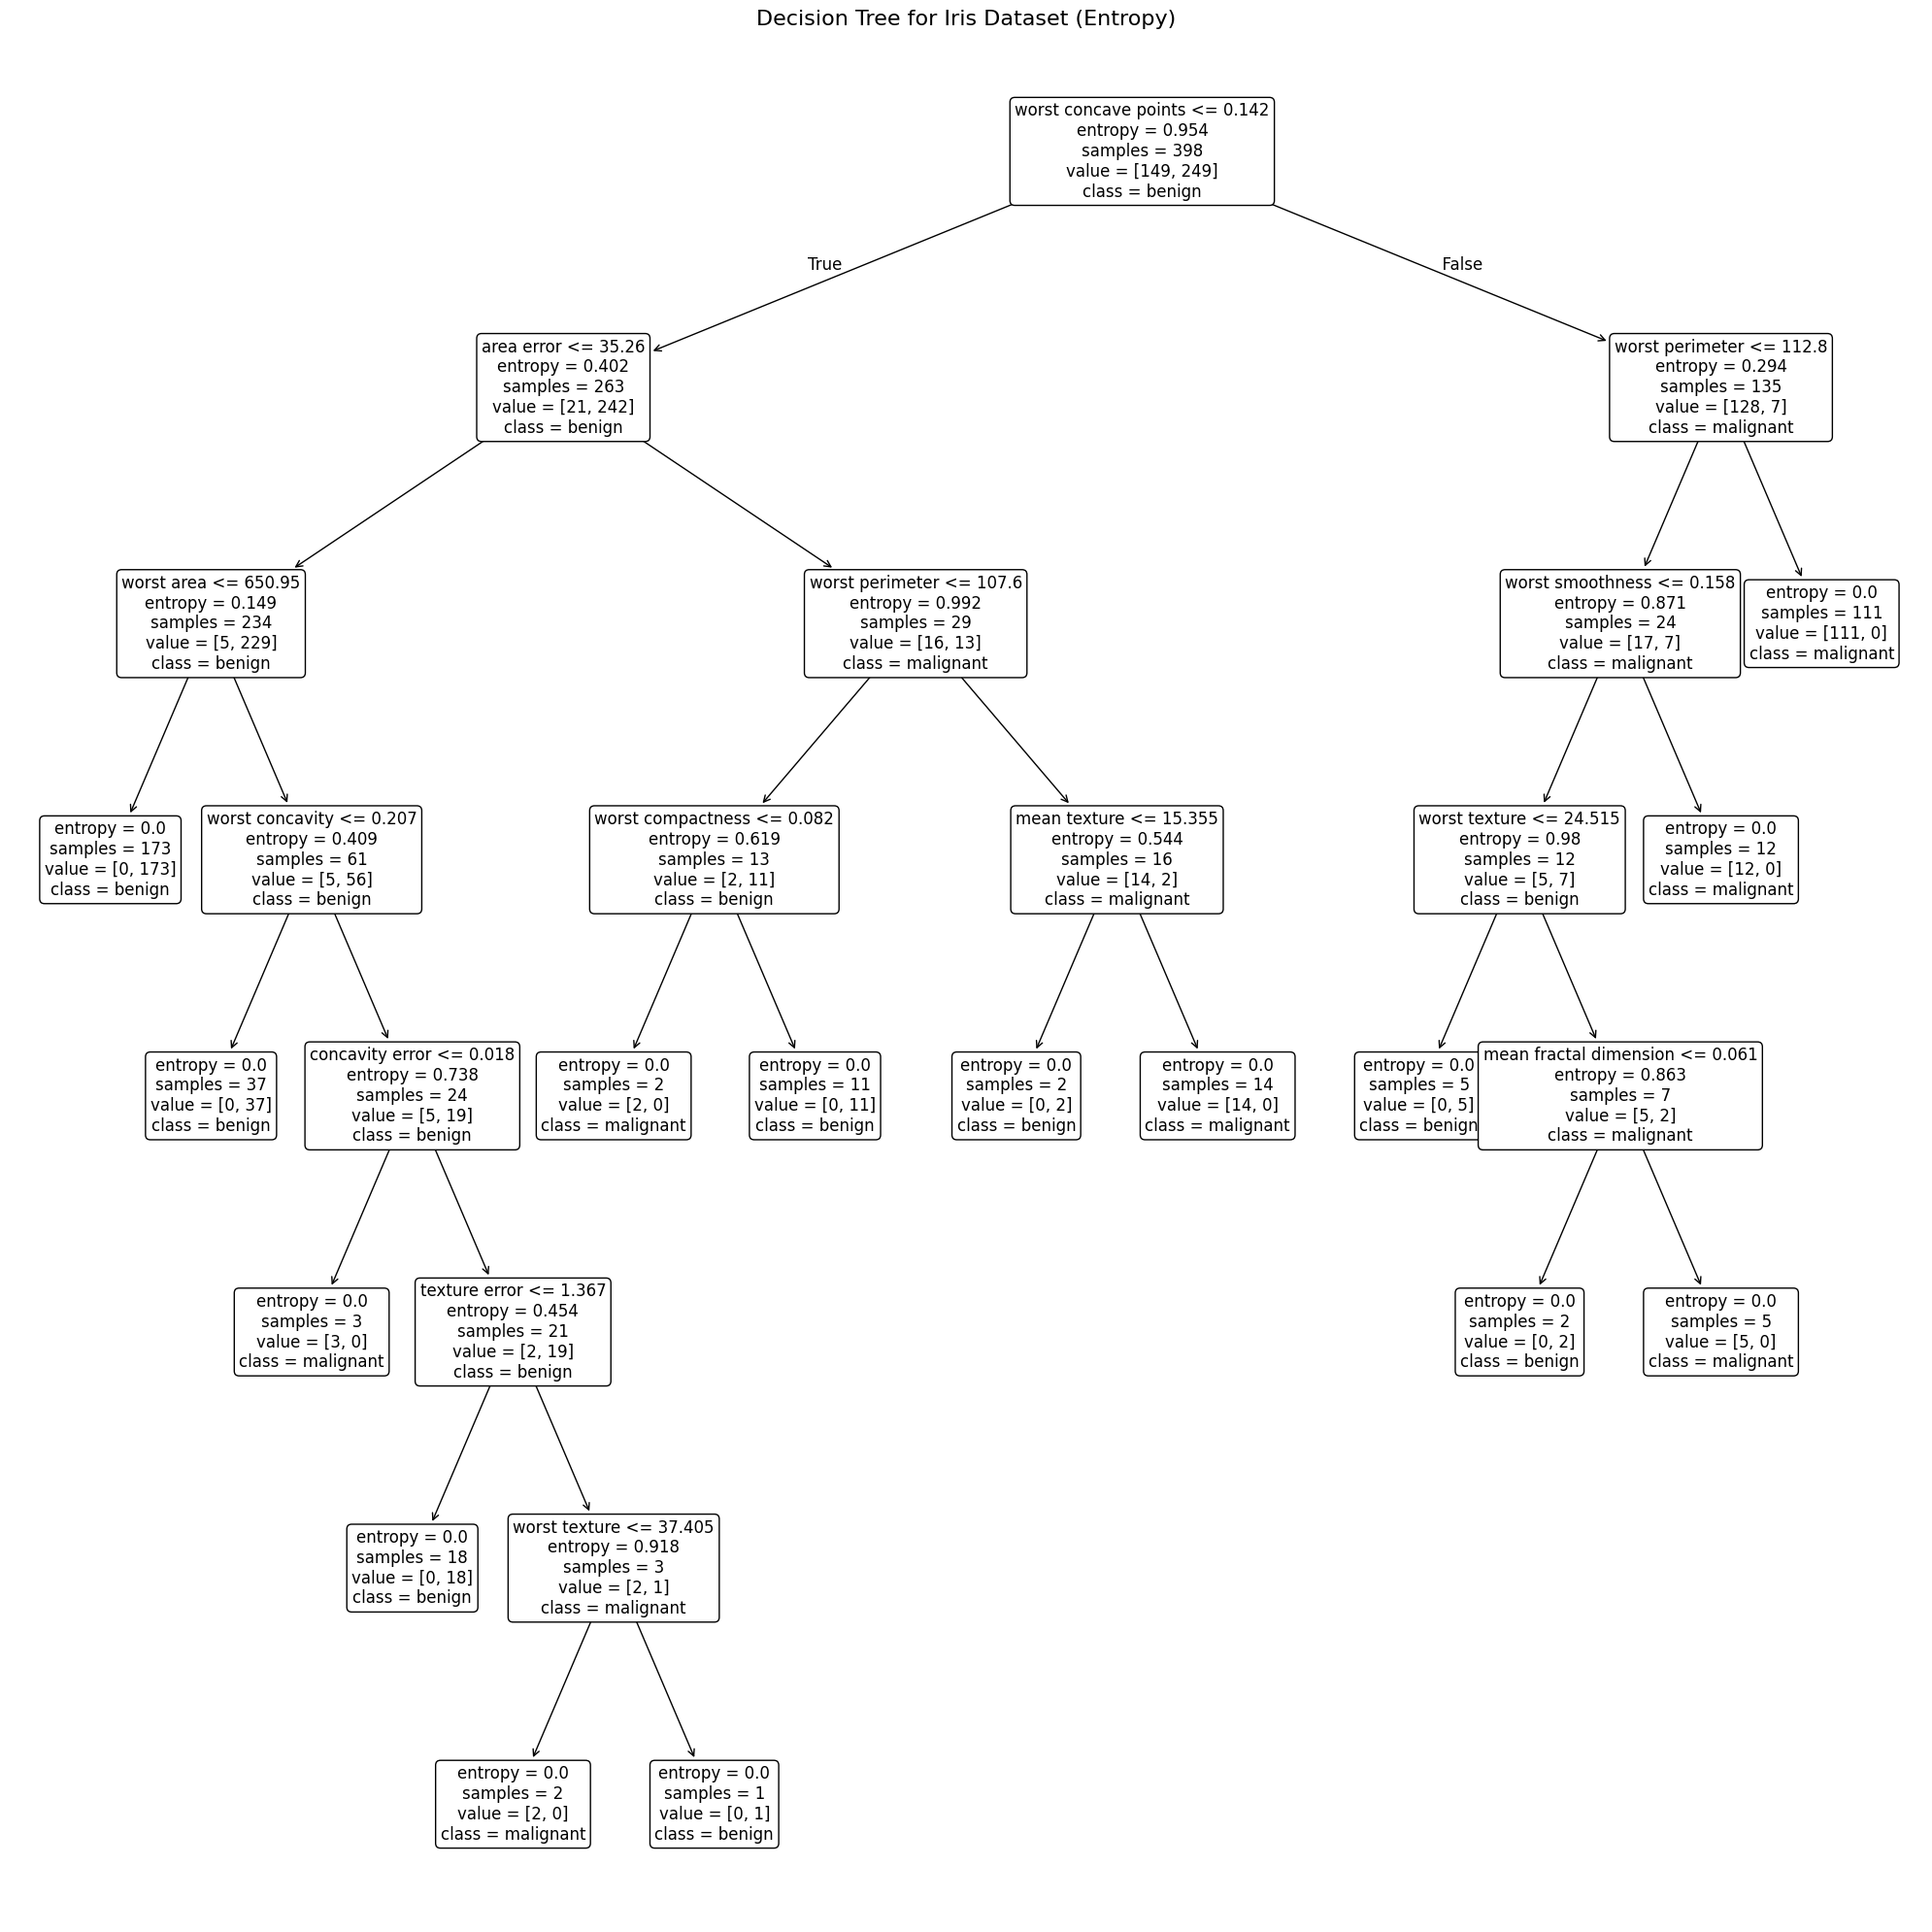

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_breast_cancer()
X = iris.data
y = iris.target

print("Target names (classes):", iris.target_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  #increasing this to 42 gives 96

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)    #gini works better with 123 random state

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ")
print(accuracy)

plt.figure(figsize=(20, 20))
plot_tree(clf,
          filled=False,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree for Iris Dataset (Entropy)", fontsize=16)
plt.tight_layout()
plt.show()

Target names (classes): ['malignant' 'benign']
Alpha: 0.0000  Accuracy: 0.9070
Alpha: 0.0069  Accuracy: 0.9172
Alpha: 0.0148  Accuracy: 0.9146
Alpha: 0.0170  Accuracy: 0.9121
Alpha: 0.0194  Accuracy: 0.9045
Alpha: 0.0202  Accuracy: 0.9045
Alpha: 0.0219  Accuracy: 0.9045
Alpha: 0.0230  Accuracy: 0.9045
Alpha: 0.0249  Accuracy: 0.9045
Alpha: 0.0302  Accuracy: 0.9020
Alpha: 0.0473  Accuracy: 0.9020
Alpha: 0.1055  Accuracy: 0.9020
Alpha: 0.5888  Accuracy: 0.6256
Accuracy: 
0.9707602339181286


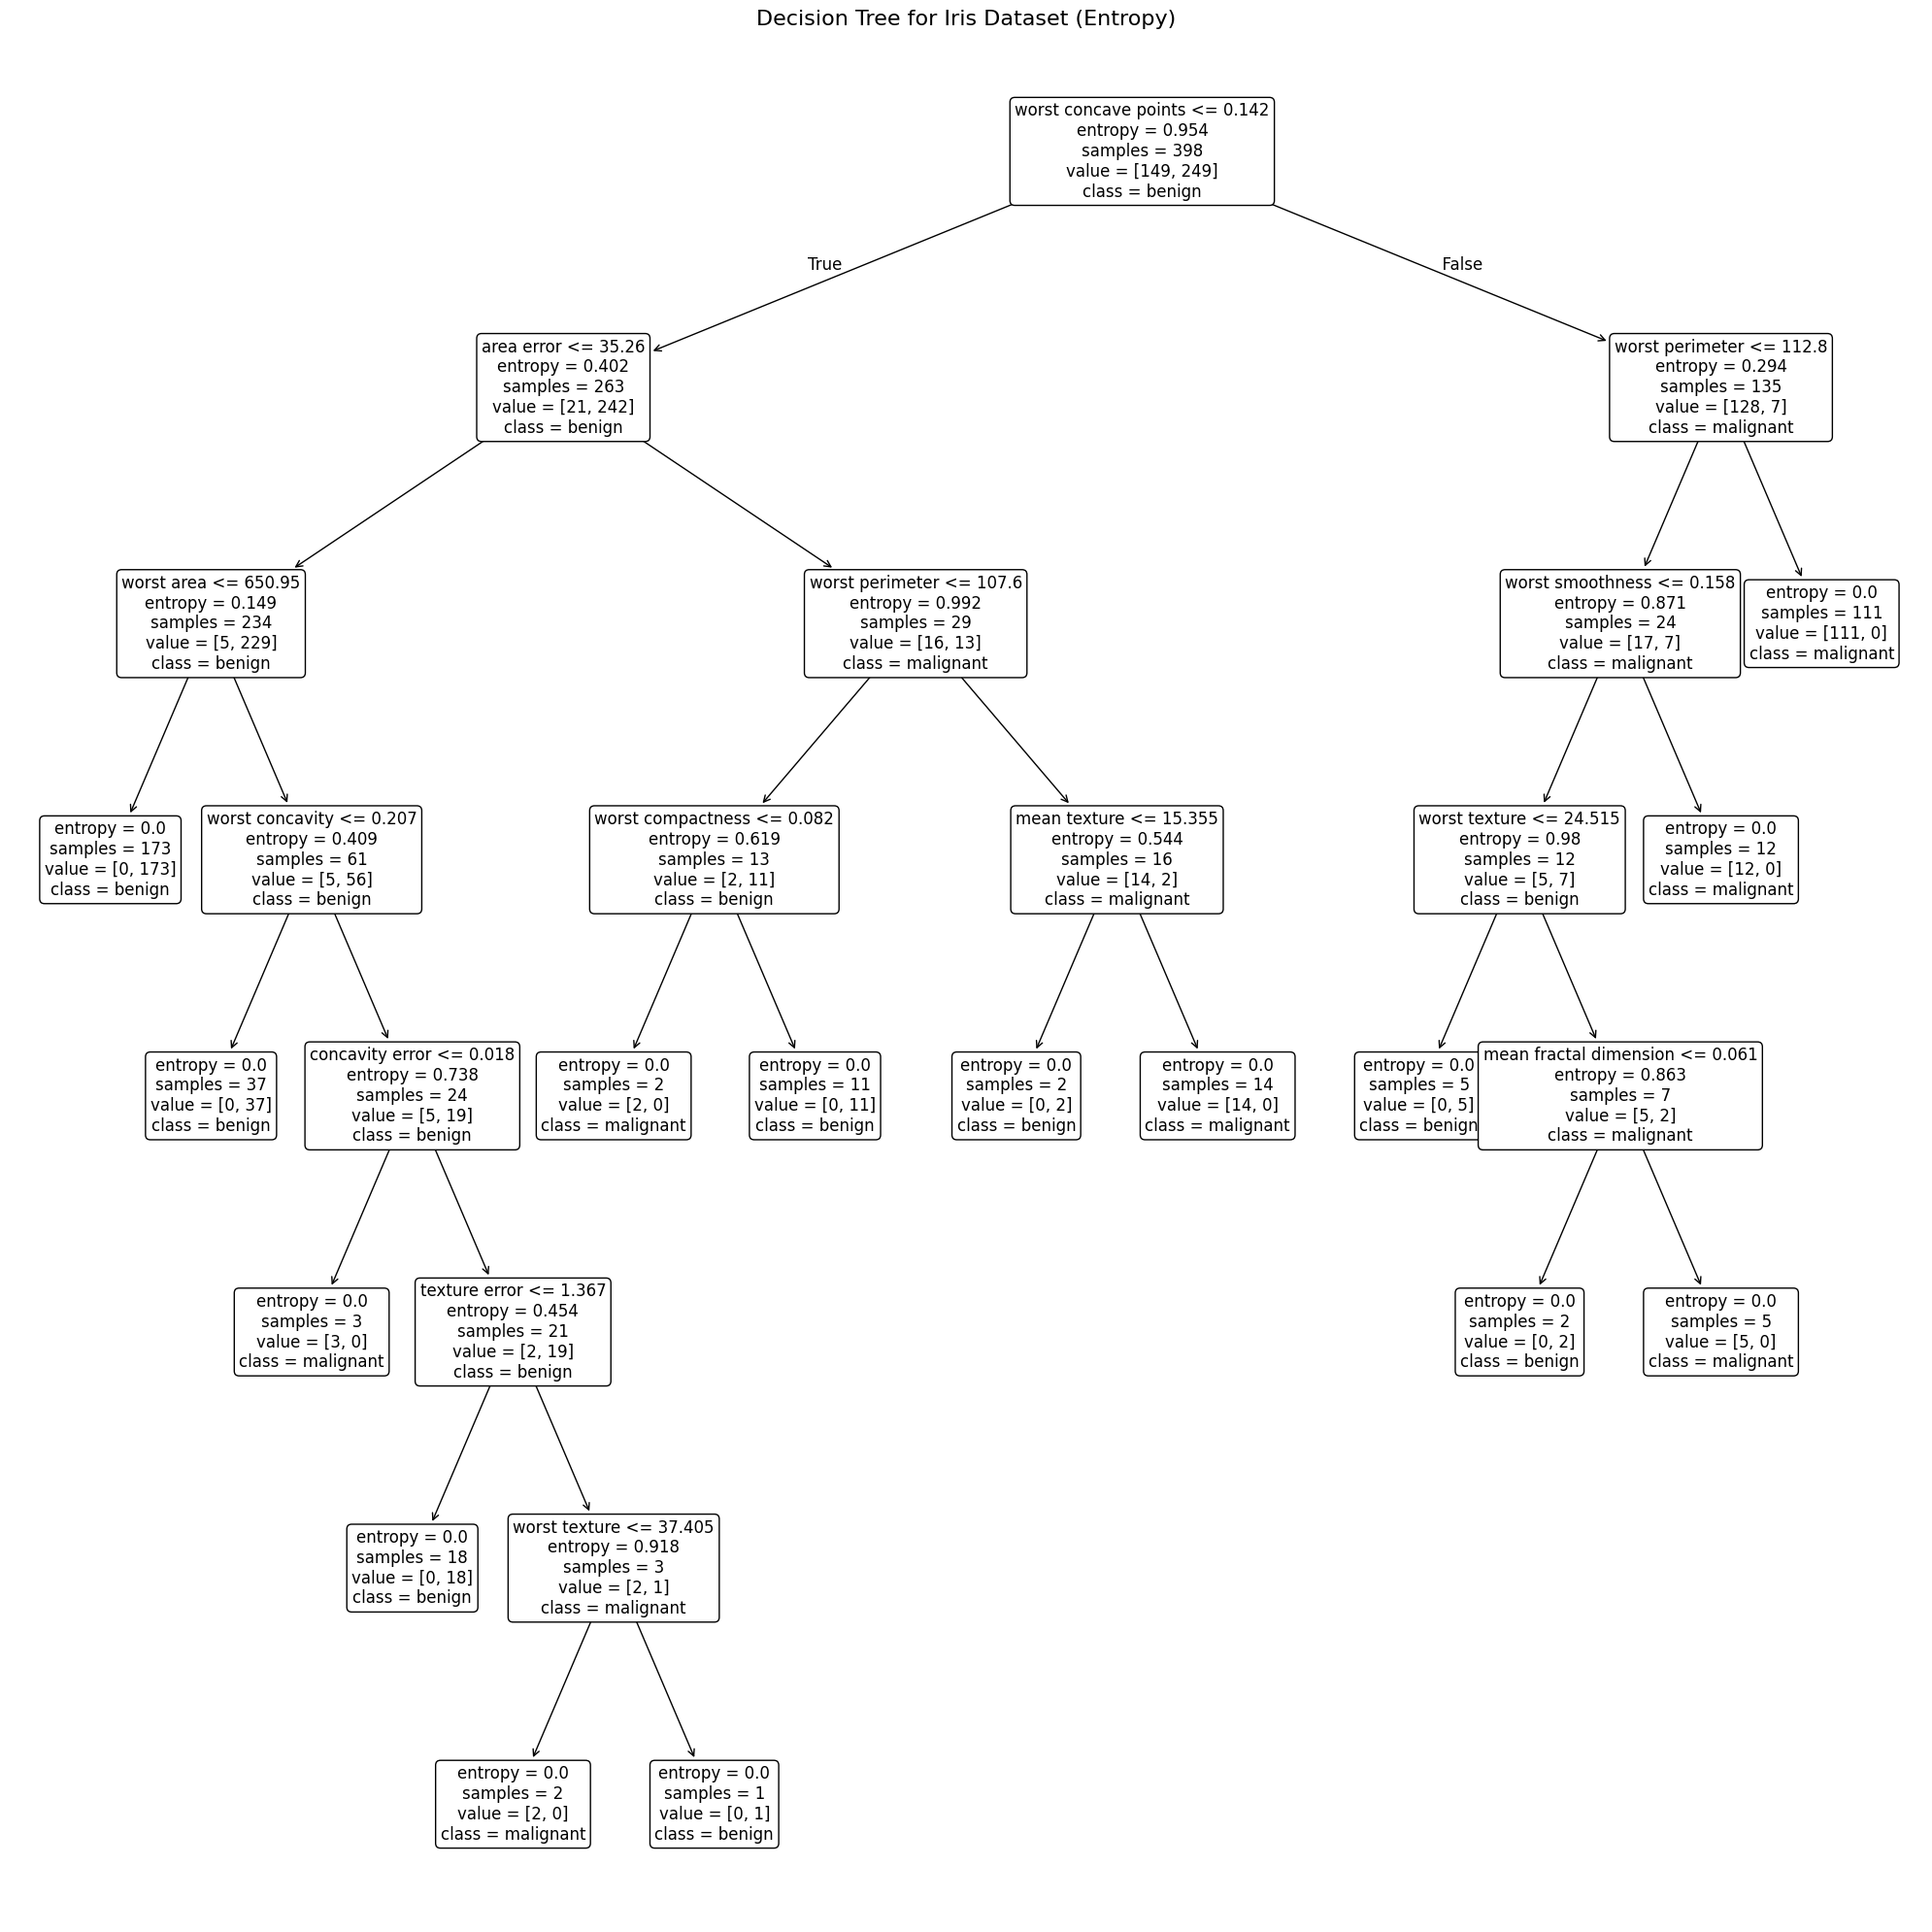

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_breast_cancer()
X = iris.data
y = iris.target

print("Target names (classes):", iris.target_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  #increasing this to 42 gives 96

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)    #gini works better with 123 random state

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


# Get pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Try different alphas and see which works best
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Alpha: {alpha:.4f}  Accuracy: {scores.mean():.4f}")

model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0069)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ")
print(accuracy)

plt.figure(figsize=(20, 20))
plot_tree(clf,
          filled=False,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree for Iris Dataset (Entropy)", fontsize=16)
plt.tight_layout()
plt.show()

Target names (classes): ['malignant' 'benign']
Alpha: 0.0000  Accuracy: 0.9070
Alpha: 0.0061  Accuracy: 0.9197
Alpha: 0.0133  Accuracy: 0.9146
Alpha: 0.0138  Accuracy: 0.9146
Alpha: 0.0148  Accuracy: 0.9146
Alpha: 0.0196  Accuracy: 0.9045
Alpha: 0.0210  Accuracy: 0.9045
Alpha: 0.0216  Accuracy: 0.9045
Alpha: 0.0225  Accuracy: 0.9045
Alpha: 0.0230  Accuracy: 0.9045
Alpha: 0.0360  Accuracy: 0.9020
Alpha: 0.0473  Accuracy: 0.9020
Alpha: 0.1055  Accuracy: 0.9020
Alpha: 0.5888  Accuracy: 0.6256

 Best alpha: 0.0061 with accuracy: 0.9197

 Test Set Accuracy with best alpha: 0.9298


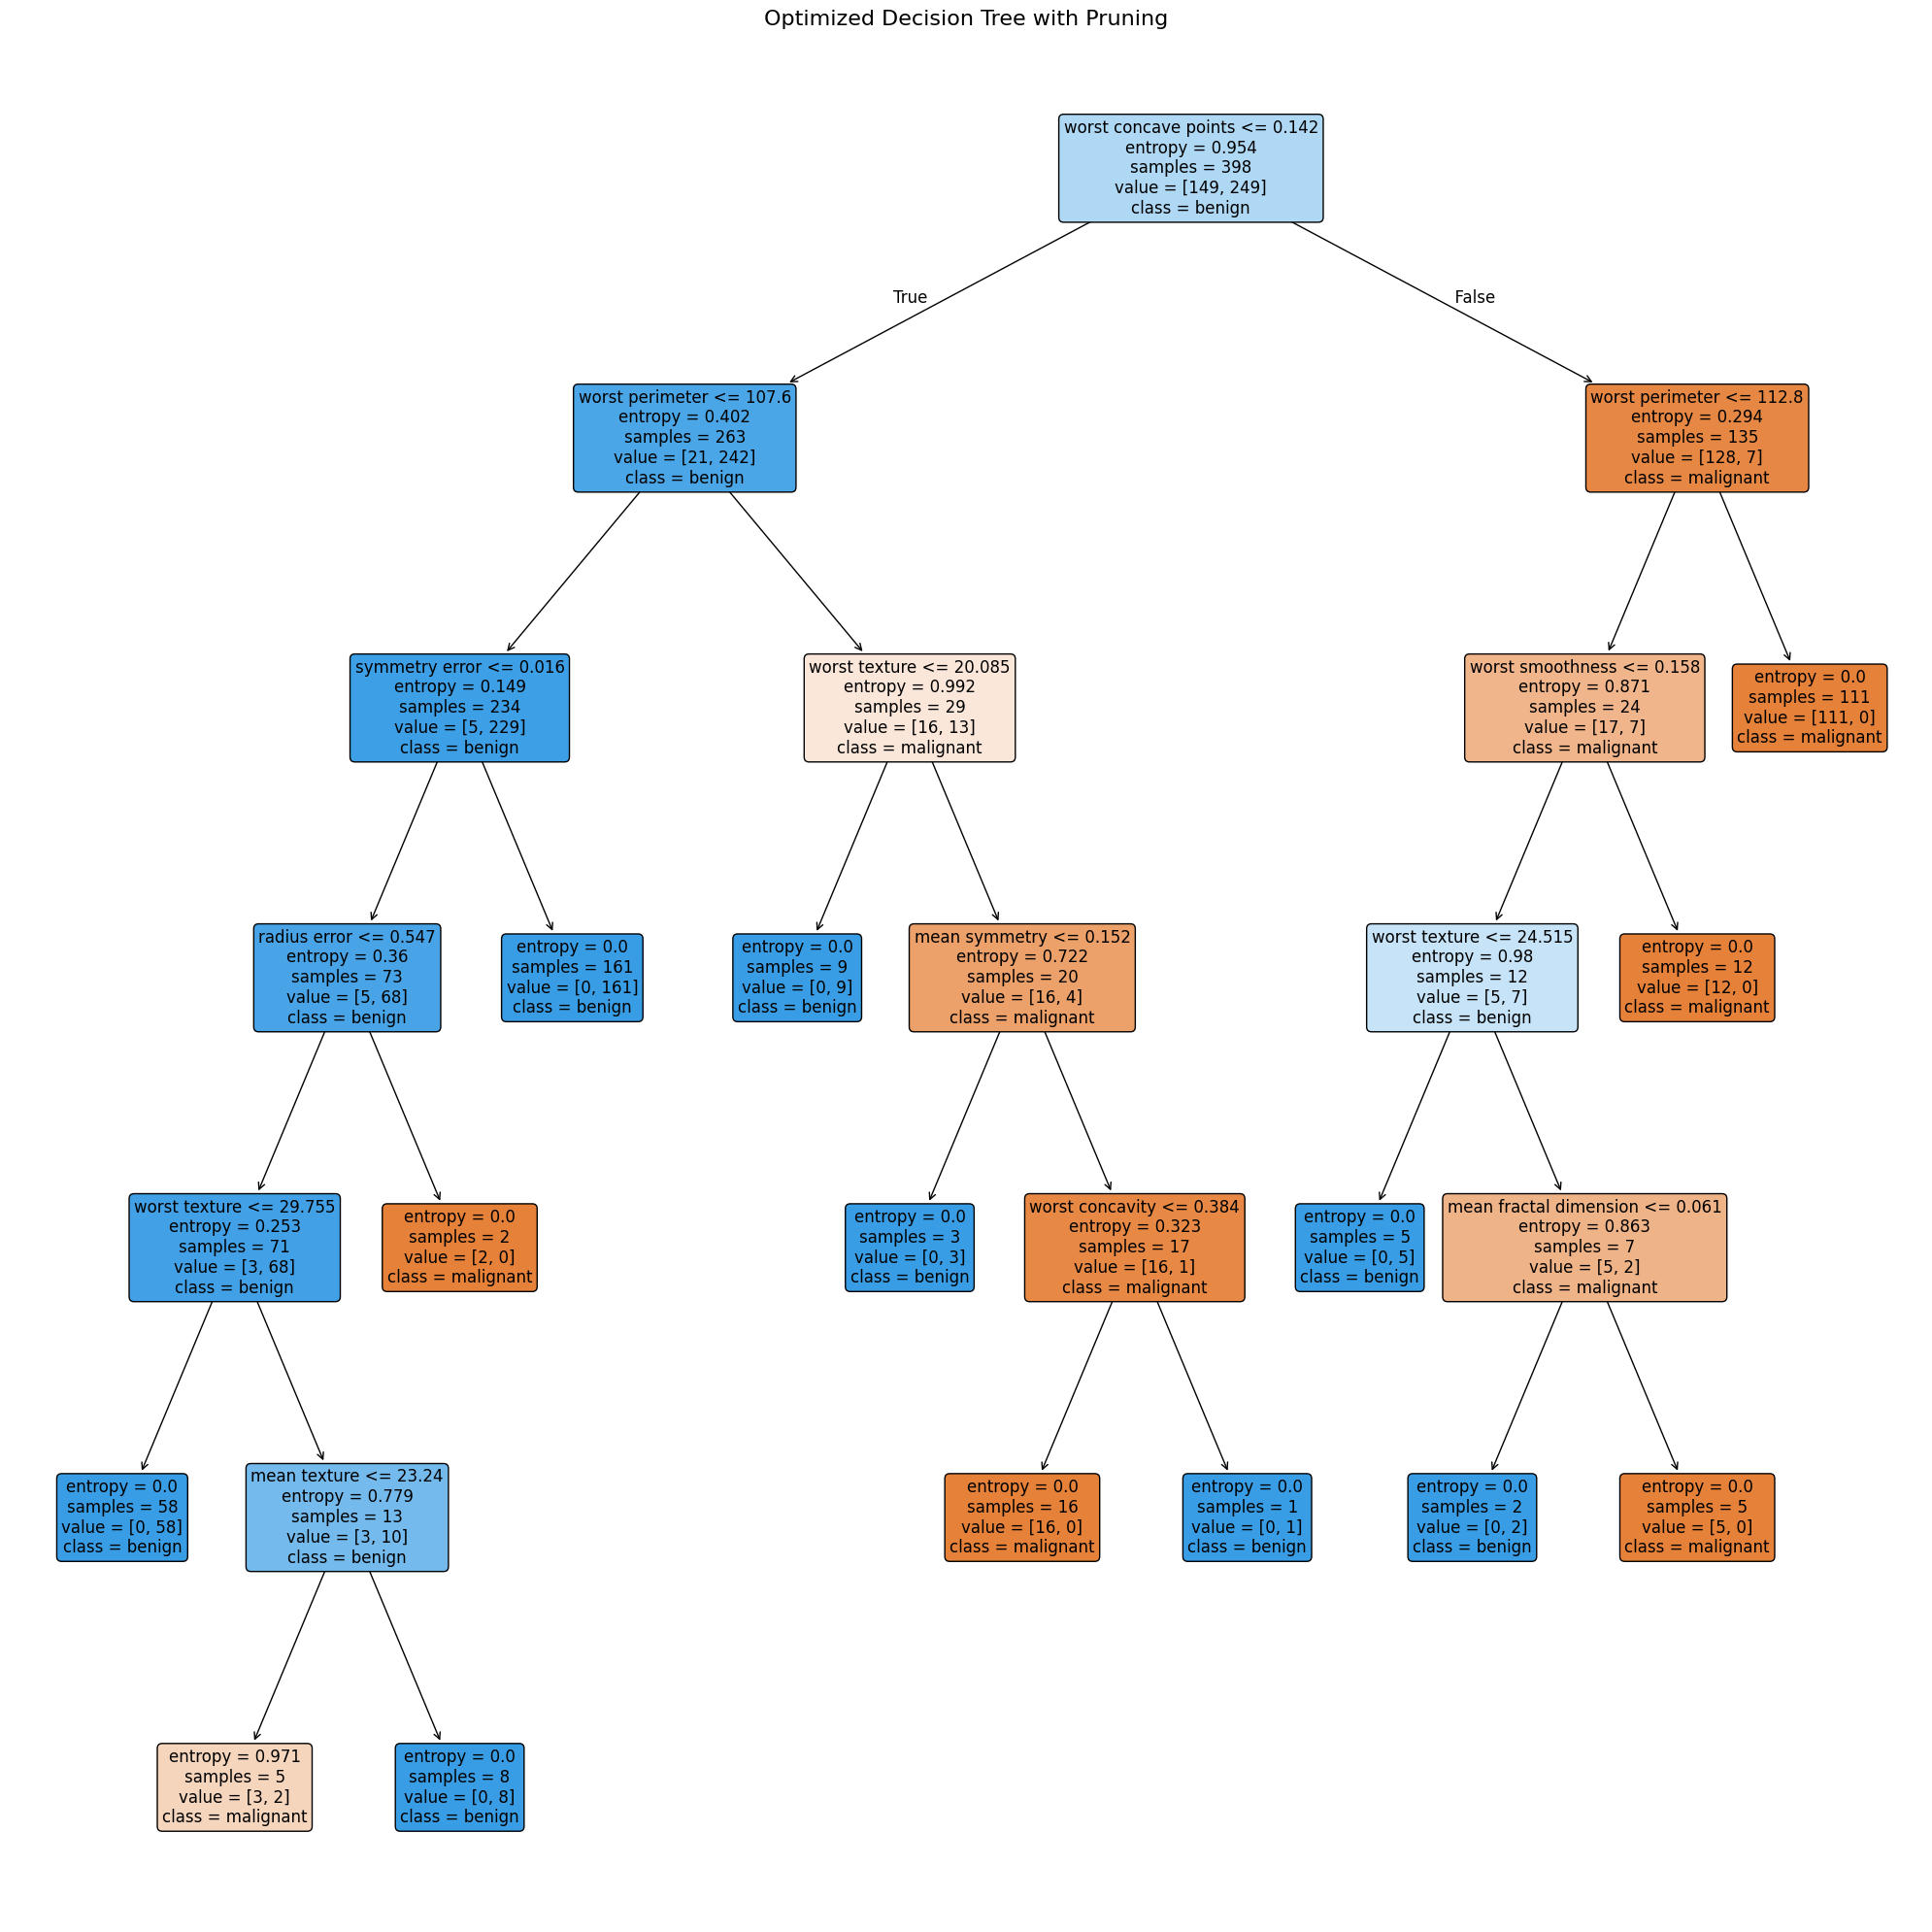

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Target names (classes):", data.target_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initial model (to get pruning path)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Get pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Find best alpha using cross-validation
alpha_scores = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    alpha_scores.append((alpha, mean_score))
    print(f"Alpha: {alpha:.4f}  Accuracy: {mean_score:.4f}")

# Pick best alpha
best_alpha, best_score = max(alpha_scores, key=lambda x: x[1])
print(f"\n Best alpha: {best_alpha:.4f} with accuracy: {best_score:.4f}")

# Train final model with best alpha
best_model = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=best_alpha)
best_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\n Test Set Accuracy with best alpha: {test_accuracy:.4f}")

# Plot tree
plt.figure(figsize=(20, 20))
plot_tree(best_model,
          filled=True,
          feature_names=data.feature_names,
          class_names=data.target_names,
          rounded=True,
          fontsize=12)
plt.title("Optimized Decision Tree with Pruning", fontsize=16)
plt.tight_layout()
plt.show()
